# COVID-19 в цифрах.

Ниже представлен небльшой анализ по заболеваемости, смертности и выздовавливаемости, а так же наглядная визуализация данных. Скучный код можно пропускать.

Данные взяты с [Kaggle](https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset#2019_nCoV_data.csv), так же можно просматривать данные на [странице GitHub](https://github.com/CSSEGISandData/COVID-19).

In [149]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns

Данные хранятся в одной таблице для удобства:
* `Country/Region` -- страна.
* `Last Update` -- дата обновления.
* `Confirmed` -- подтверждение случаев.
* `Deaths` -- смертей.
* `Recovered` -- выздоровевших.

In [221]:
data = pd.read_csv('covid_19_data.csv')

data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


Посчитаем в скольки сранах однаружен коронавирус на данный момент:

In [223]:
data.loc[data['Country/Region'] == 'Mainland China', 'Country/Region'] = 'China' 

country_list = data['Country/Region'].unique()

print('Коронавирус обнаужен в {} странах:'.format(country_list.size))

for county in sorted(country_list):
    print('- {}'.format(county))

Коронавирус обнаужен в 222 странах:
-  Azerbaijan
- ('St. Martin',)
- Afghanistan
- Albania
- Algeria
- Andorra
- Angola
- Antigua and Barbuda
- Argentina
- Armenia
- Aruba
- Australia
- Austria
- Azerbaijan
- Bahamas
- Bahamas, The
- Bahrain
- Bangladesh
- Barbados
- Belarus
- Belgium
- Belize
- Benin
- Bhutan
- Bolivia
- Bosnia and Herzegovina
- Botswana
- Brazil
- Brunei
- Bulgaria
- Burkina Faso
- Burma
- Burundi
- Cabo Verde
- Cambodia
- Cameroon
- Canada
- Cape Verde
- Cayman Islands
- Central African Republic
- Chad
- Channel Islands
- Chile
- China
- Colombia
- Comoros
- Congo (Brazzaville)
- Congo (Kinshasa)
- Costa Rica
- Croatia
- Cuba
- Curacao
- Cyprus
- Czech Republic
- Denmark
- Diamond Princess
- Djibouti
- Dominica
- Dominican Republic
- East Timor
- Ecuador
- Egypt
- El Salvador
- Equatorial Guinea
- Eritrea
- Estonia
- Eswatini
- Ethiopia
- Faroe Islands
- Fiji
- Finland
- France
- French Guiana
- Gabon
- Gambia
- Gambia, The
- Georgia
- Germany
- Ghana
- Gibraltar
-

In [226]:
data['Last Update'] = pd.to_datetime(data['Last Update'])
data['Date_date'] = data['Last Update'].apply(lambda x:x.date())
df_by_date=data.groupby(['Date_date']).sum().reset_index(drop=None)

# there is smt strange
df_by_date = df_by_date.loc[df_by_date['Confirmed'] != 2614186.0]

## Выведем графики заболеваемости и выздоравливаемости.

Данные в сумме по миру.

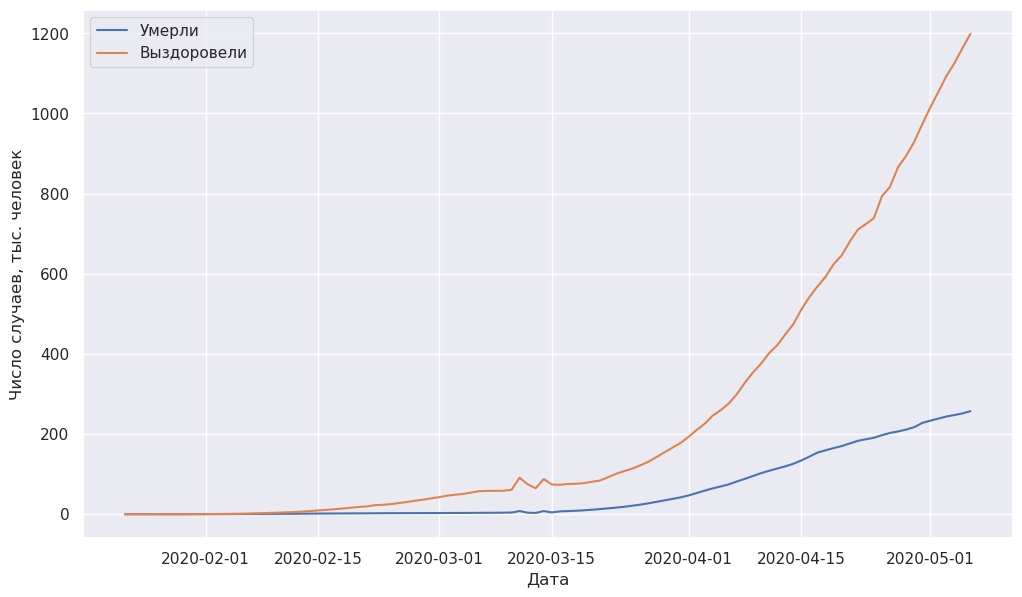

In [232]:
mpl.rcParams['figure.figsize'] = [12.0, 7.0]
mpl.rcParams['figure.dpi'] = 100

sns.set()

d = {"Deaths":"Умерли", "Recovered":"Выздоровели"}

for label in d:
    plt.plot(df_by_date["Date_date"],
             df_by_date[label]/1000,
             label=d[label])
    
plt.xlabel('Дата')
plt.ylabel('Число случаев, тыс. человек')
plt.legend()
plt.show()


## Смертность и количество выздоровевших людей.

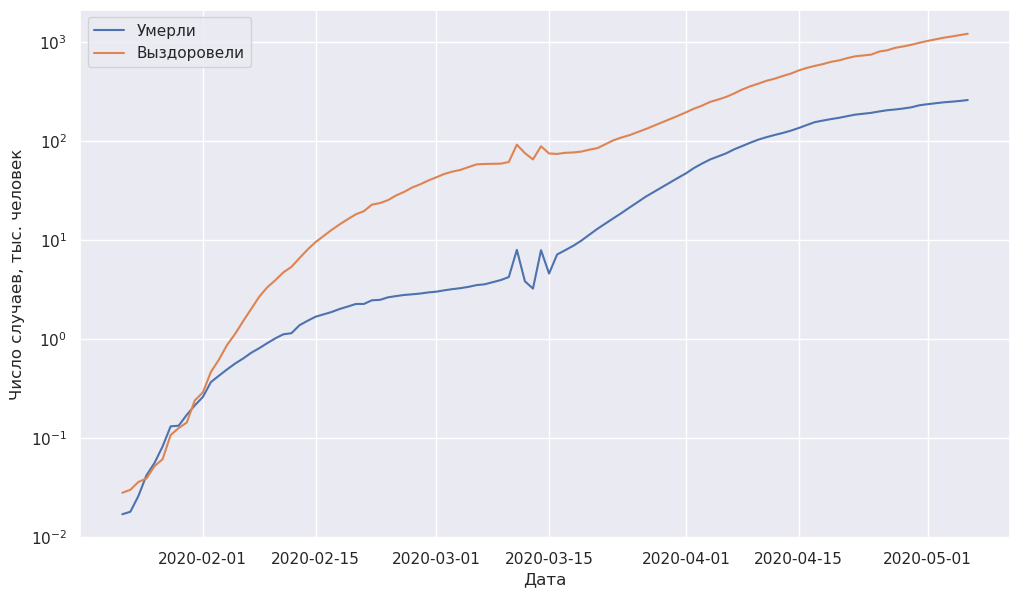

In [231]:
plt.yscale('log')
for label in d:
    plt.plot(df_by_date["Date_date"],
             df_by_date[label]/1000,
             label=d[label])

plt.ylabel('Число случаев, тыс. человек')
plt.xlabel('Дата')
plt.legend()
plt.show()

## Грубая оценка летальности: 

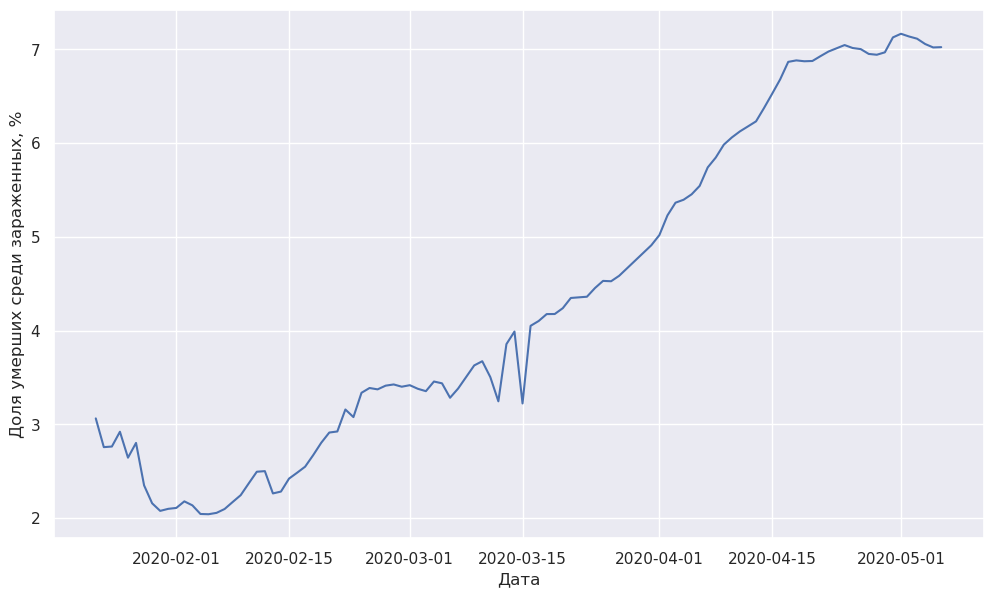

In [217]:
plt.plot(df_by_date["Date_date"],
         df_by_date['Deaths']/df_by_date['Confirmed']*100)

plt.ylabel('Доля умерших среди зараженных, %')
plt.xlabel('Дата')
plt.show()

## Динамика выздоровления:

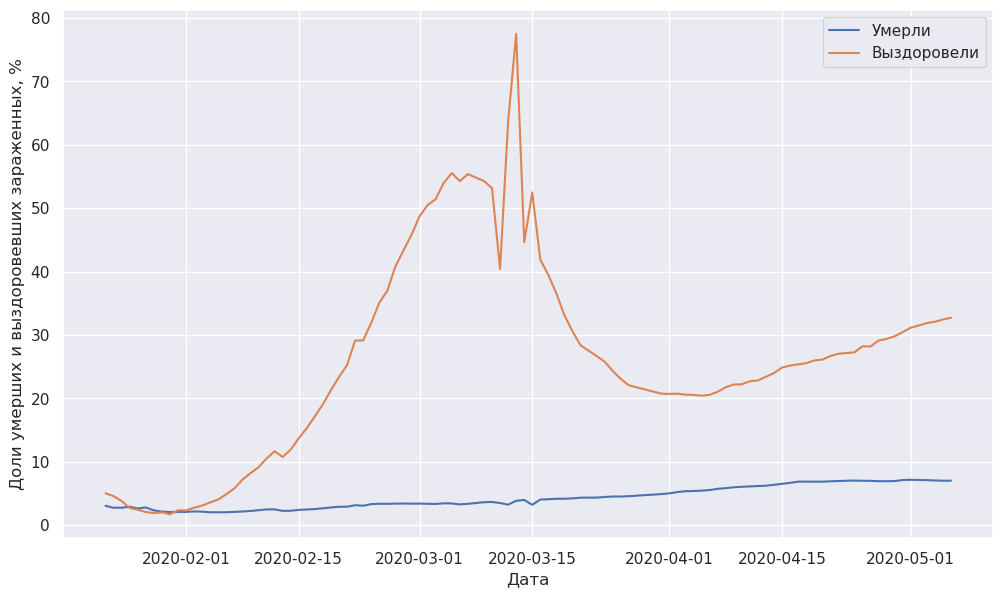

In [218]:
for label in d:
    plt.plot(df_by_date["Date_date"],
             df_by_date[label]/df_by_date['Confirmed']*100,
             label=d[label])

plt.ylabel('Доли умерших и выздоровевших зараженных, %')
plt.xlabel('Дата')
plt.legend()
plt.show()